## Loading Data

In [57]:
import csv

In [58]:
# Census data found here: https://data.census.gov/cedsci/
data = []
with open("pay.csv") as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

In [59]:
import pandas as pd

In [60]:
df = pd.DataFrame(data[1:], columns = data[0])

In [61]:
df.head()

,"﻿""Geographic Area Name (NAME)""",Year (YEAR),Meaning of Survey Component (SVY_COMP_LABEL),Meaning of Aggregate Description (AGG_DESC_LABEL),Meaning of Type of Government (GOVTYPE_LABEL),Full-Time Employment (FT_EMP),Full-Time Payroll (FT_PAY),Part-Time Employment (PT_EMP),Part-Time Payroll (PT_PAY),Part-Time Hours (PT_HRS),...,Total Full-Time and Part-Time Employment (TOT_EMP),Total Full-Time and Part-Time Payroll (TOT_PAY),Full-Time Employment Coefficient of Variation (FT_EMP_CV),Full-Time Payroll Coefficient of Variation (FT_PAY_CV),Part-Time Employment Coefficient of Variation (PT_EMP_CV),Part-Time Payroll Coefficient of Variation (PT_PAY_CV),Part-Time Hours Coefficient of Variation (PT_HRS_CV),Full-Time Equivalent Employment Coefficient of Variation (FTE_CV),Total Full-Time and Part-Time Employment Coefficient of Variation (TOT_EMP_CV),Total Full-Time and Part-Time Payroll Coefficient of Variation (TOT_PAY_CV)
0,United States,2017,Annual Survey of Public Employment & Payroll,Total - All Government Employment Functions,State and Local,"14,691,727","74,284,662,138","4,882,502","6,471,133,179","337,088,505",...,"19,574,229","80,755,795,317",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,United States,2018,Annual Survey of Public Employment & Payroll,Total - All Government Employment Functions,State and Local,"14,816,383","76,677,282,775","4,822,932","6,477,938,978","323,006,921",...,"19,639,315","83,155,221,753",0.07,0.06,0.06,0.06,0.08,0.06,0.05,0.05
2,United States,2019,Annual Survey of Public Employment & Payroll,Total - All Government Employment Functions,State and Local,"14,898,997","79,534,542,242","4,785,966","6,710,419,701",N,...,"19,684,963","86,244,961,943",0.05,0.04,0.03,0.03,N,0.04,0.04,0.03
3,United States,2020,Annual Survey of Public Employment & Payroll,Total - All Government Employment Functions,State and Local,"15,061,255","82,724,752,054","4,679,831","6,864,608,283",N,...,"19,741,086","89,589,360,337",0.05,0.04,0.02,0.02,N,0.04,0.04,0.03
4,United States,2021,Annual Survey of Public Employment & Payroll,Total - All Government Employment Functions,State and Local,"14,868,829","83,437,482,805","3,959,420","6,365,538,338",N,...,"18,828,249","89,803,021,143",0.05,0.04,0.02,0.02,N,0.04,0.04,0.03


In [225]:
#Note there is only one type of government
#Extract all possible types of aggregates descriptions and turn it into a list
meanings = df["Meaning of Aggregate Description (AGG_DESC_LABEL)"].unique().tolist()
print(meanings)

['Total - All Government Employment Functions', 'Financial Administration', 'Other Government Administration', 'Judicial and Legal', 'Police Protection Total', 'Police Protection - Persons with Power of Arrest', 'Police Protection - Other', 'Fire Protection Total', 'Fire Protection - Firefighters', 'Fire Protection - Other', 'Corrections', 'Highways', 'Air Transportation', 'Sea and Inland Port Facilities', 'Public Welfare', 'Health', 'Hospitals', 'Social Insurance Administration', 'Solid Waste Management', 'Sewerage', 'Parks and Recreation', 'Housing and Community Development', 'Natural Resources', 'Water Supply', 'Electric Power', 'Gas Supply', 'Transit', 'Education Total', 'Education - Elementary and Secondary Total', 'Education - Elementary and Secondary Instructional', 'Education - Elementary and Secondary Other', 'Education - Higher Education Total', 'Education - Higher Education Instructional', 'Education - Higher Education Other', 'Education - Other', 'Libraries', 'State liquor 

In [226]:
val_dict = {}
for val in meanings:
    little_df = df[df["Meaning of Aggregate Description (AGG_DESC_LABEL)"] == val][["Meaning of Aggregate Description (AGG_DESC_LABEL)",\
                                                                "Year (YEAR)","Total Full-Time and Part-Time Payroll (TOT_PAY)"]]
    val_dict[val] = little_df

## Full Time Analysis

In [227]:
# None of the dataframes are missing full time employment values!
key = 'Total Full-Time and Part-Time Payroll (TOT_PAY)'
for val in val_dict:
    little_df = val_dict[val]
    assert(not (any(little_df["Total Full-Time and Part-Time Payroll (TOT_PAY)"]=='N')))
    little_df[key] = little_df[key].map(lambda x: x.replace(',',''))
    little_df[key] = little_df[key].astype('float')

In [228]:
import matplotlib.pyplot as plt
import os

In [229]:
# normalize for inflation: https://www.bls.gov/data/inflation_calculator.htm
normalization = [1, 1.02, 1.04, 1.06, 1.08]

for val in val_dict:
    little_df = val_dict[val]
    keys = list(little_df[key].keys())
    normalized_ft = []
    for i in range(5):
        normalized_ft.append(little_df[key][keys[i]]*normalization[i])
    little_df["Normalized Total"] = normalized_ft
    

<ipython-input-230-c68d56b230f8>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


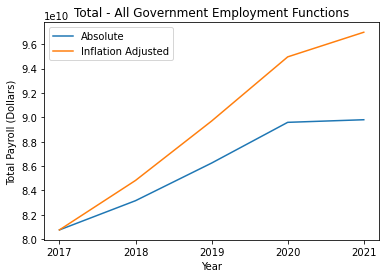

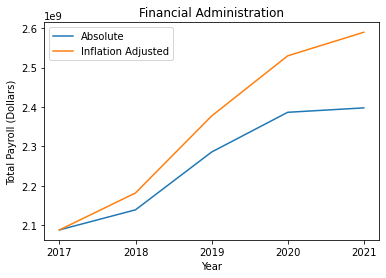

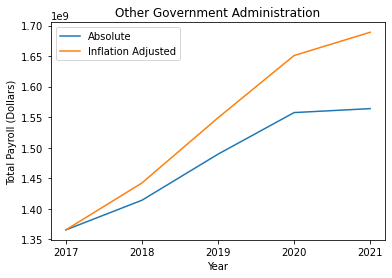

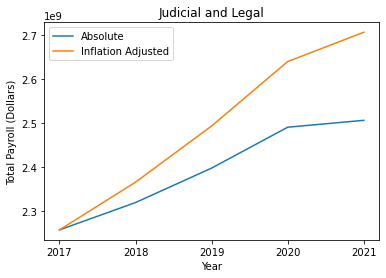

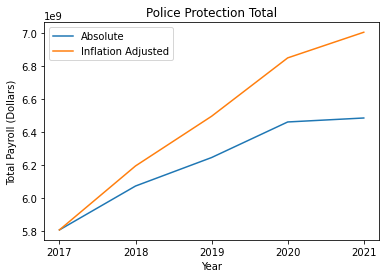

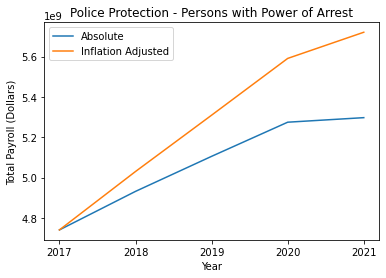

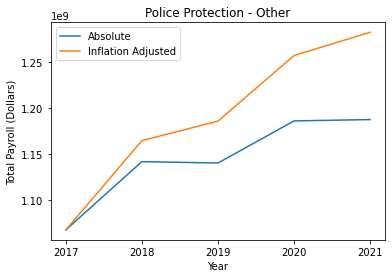

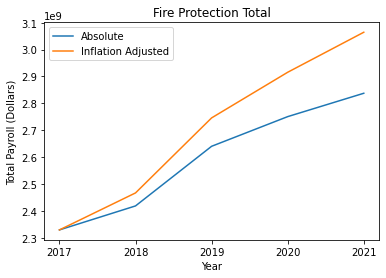

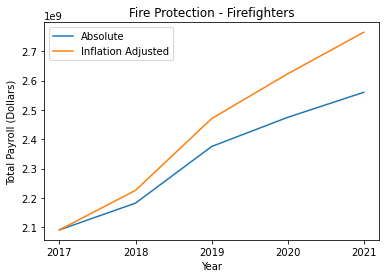

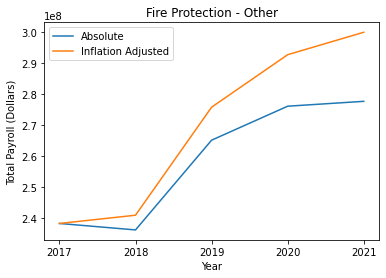

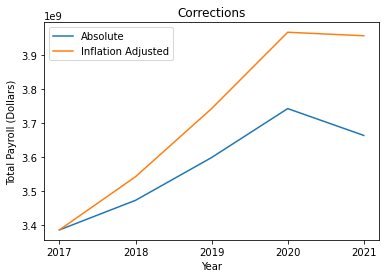

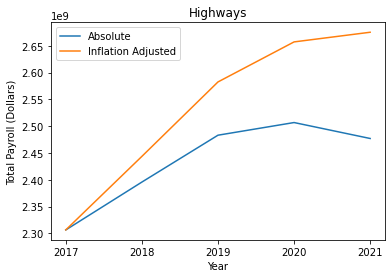

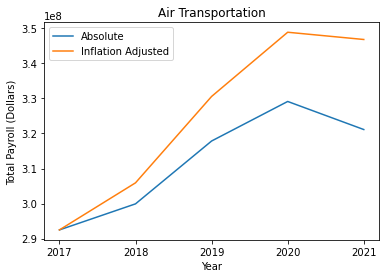

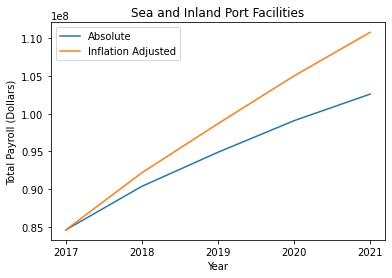

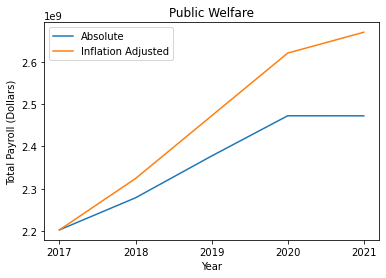

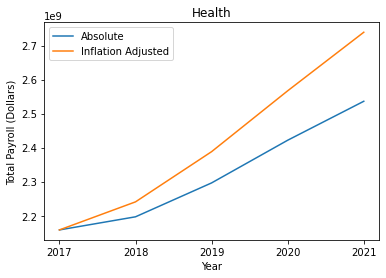

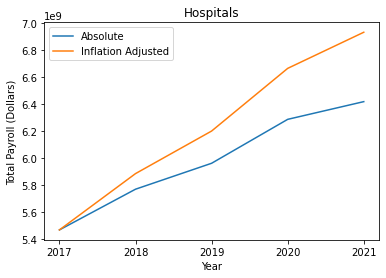

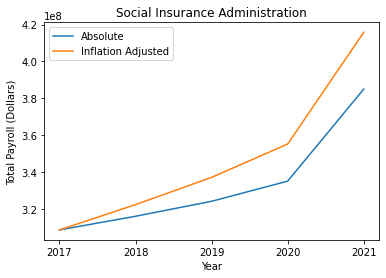

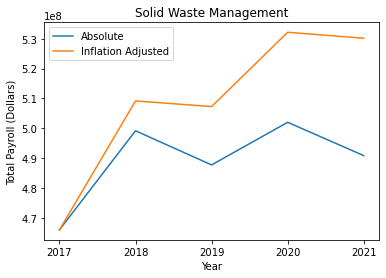

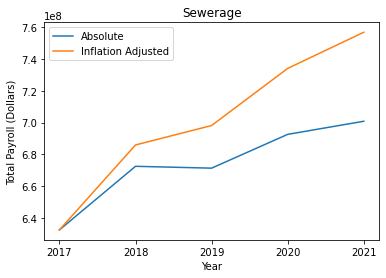

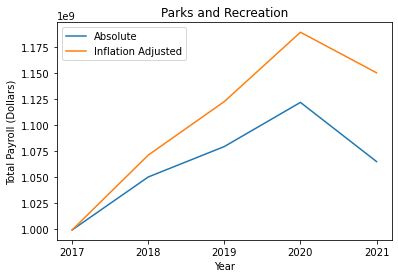

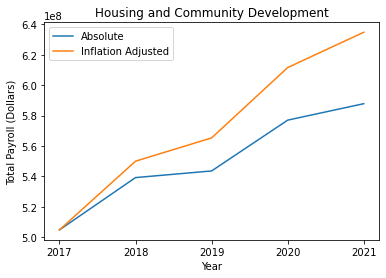

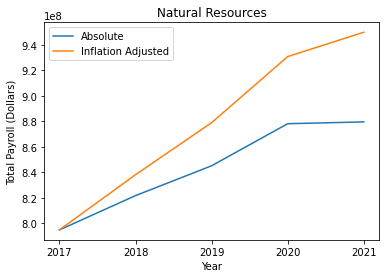

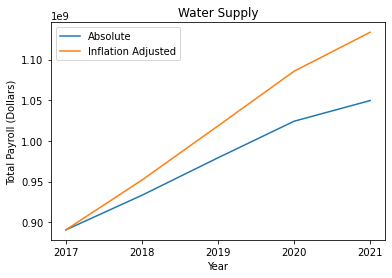

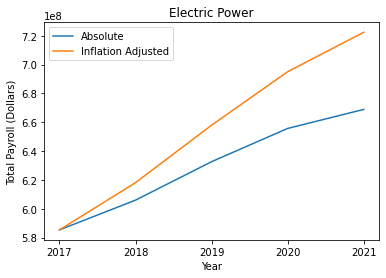

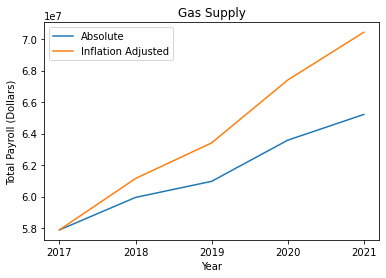

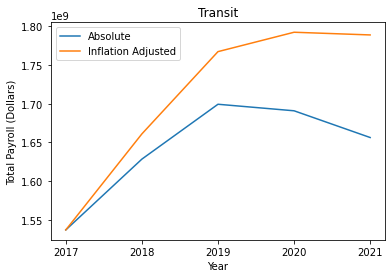

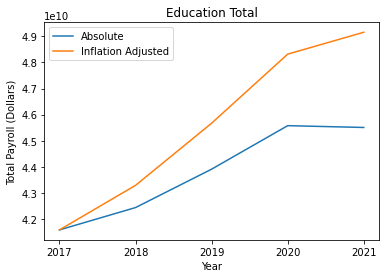

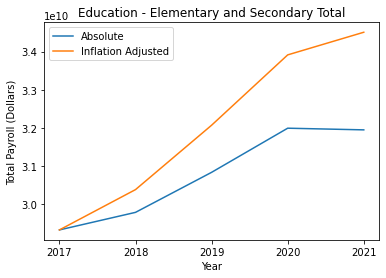

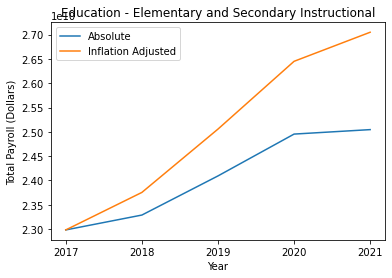

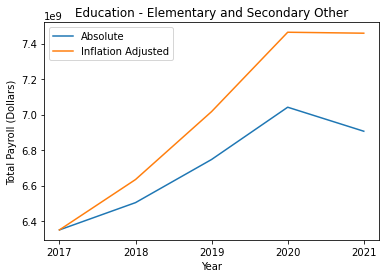

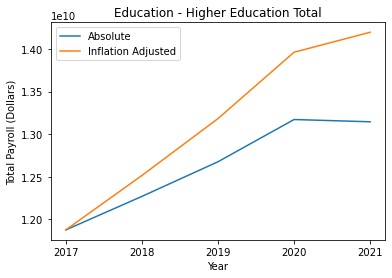

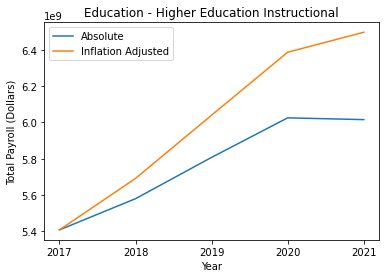

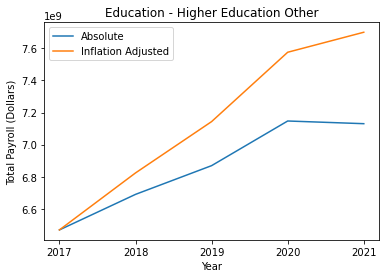

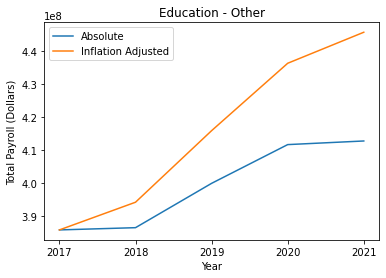

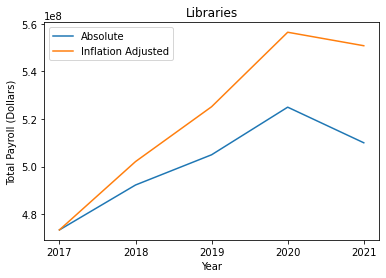

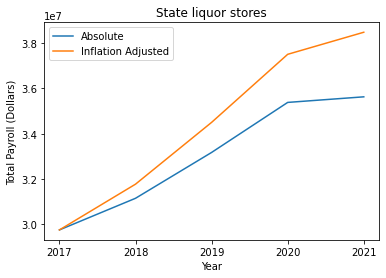

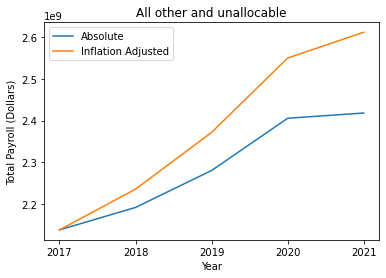

In [230]:
outfolder = "/Users/vineetkamat/Documents/Masters/Summer 2022/Theory of Statistics/Project/Time Series"
for val in val_dict:
    little_df = val_dict[val]
    x1 = little_df["Year (YEAR)"]
    lst1 = little_df[key].tolist()
    lst2 = little_df["Normalized Total"].tolist()
    plt.figure()
    plt.plot(x1, lst1, label = "Absolute")
    plt.plot(x1, lst2, label = "Inflation Adjusted")
    plt.ylabel("Total Payroll (Dollars)")
    plt.xlabel("Year")
    plt.title(val)
    plt.legend()
    plt.savefig(os.path.join(outfolder, val+".jpg"), dpi=300)

# Regression

In [231]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools import add_constant

In [232]:
fig_folder = "/Users/vineetkamat/Documents/Masters/Summer 2022/Theory of Statistics/Project/Regression/Total"

In [233]:
def calculate_and_plot(predictor, output_name, predictor_name, plot_folder, payroll_dict, ptype):
    key = 'Total Full-Time and Part-Time Payroll (TOT_PAY)'
    years = [2017,2018,2019,2020,2021]
    payroll = payroll_dict[output_name][key].tolist()
    
    regr = sm.OLS(payroll, add_constant(predictor)).fit()
    print(regr.aic)
    print(regr.rsquared_adj)
    
    ps = regr.params
    y2 = [ps[1]*x+ps[0] for x in predictor]
    years = [2017,2018,2019,2020,2021]
    
    x = payroll_dict[output_name]["Year (YEAR)"].tolist()
    plt.plot(years, y2, label="Predicted")
    plt.plot(years, payroll, label="Actual")
    plt.title(ptype+ " Payroll vs "+predictor_name)
    plt.ylabel("Payroll in Dollars")
    plt.xlabel("Years")
    plt.xticks(years)
    plt.legend()
    plt.savefig(os.path.join(fig_folder, predictor_name + ".png"), dpi=300)

## Total

### Time

222.51394362149435
0.9408099464998901


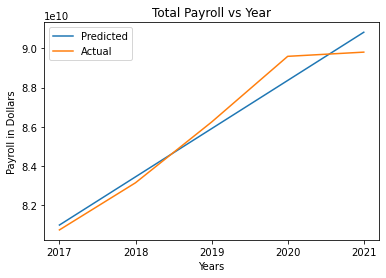

In [234]:
calculate_and_plot(years, "Total - All Government Employment Functions", "Year", fig_folder, val_dict, 'Total')

### Population

218.49592908553933
0.9734998443812133


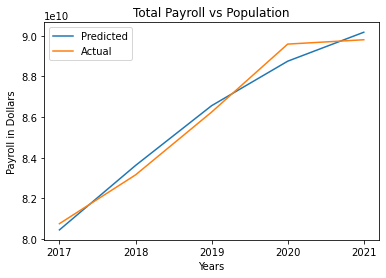

In [235]:
# We expect population to affect government payroll
# Let's see if population and TOTAL government spending are correlated
# https://www.macrotrends.net/countries/USA/united-states/population

# Predictor
population = [329791231, 332140037, 334319671, 335942003, 336997624]

calculate_and_plot(population, "Total - All Government Employment Functions", "Population", fig_folder, val_dict,'Total')

### GDP

233.82739740503624
0.43124812368144416


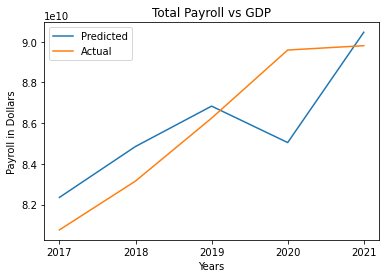

In [236]:
# https://tradingeconomics.com/united-states/gdp
gdp = [59915, 62805, 65095, 63028, 69288]

calculate_and_plot(gdp, "Total - All Government Employment Functions", "GDP", fig_folder, val_dict, 'Total')

### Tax Revenue

227.76121226906878
0.8309478508648519


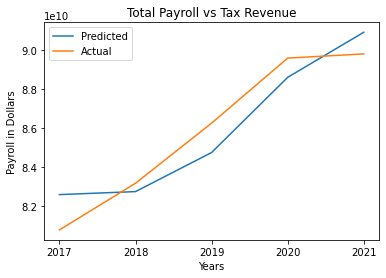

In [237]:
# https://www.thebalance.com/current-u-s-federal-government-tax-revenue-3305762
tax_revenue = [3.32,3.33,3.46,3.71,3.86]

calculate_and_plot(tax_revenue, "Total - All Government Employment Functions", "Tax Revenue", fig_folder, val_dict, 'Total')

## Education

In [238]:
fig_folder = "/Users/vineetkamat/Documents/Masters/Summer 2022/Theory of Statistics/Project/Regression/Education"

### Time

212.62872050473564
0.9129398754420658


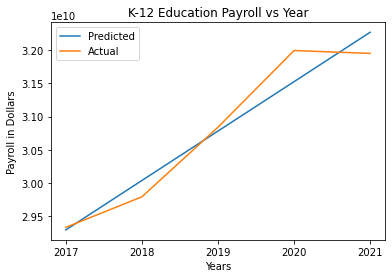

In [239]:
# Let's see how education changes with various factors
# We will look at elementary and secondary total payroll
years = [2017,2018,2019,2020,2021]

calculate_and_plot(years, "Education - Elementary and Secondary Total", "Year", fig_folder, val_dict, 'K-12 Education')

### Number of kids

212.90651331939716
0.907966050087181


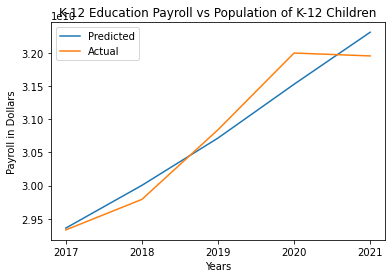

In [240]:
# Let's see how education changes with various factors
# We will look at elementary and secondary total payroll
# https://nces.ed.gov/programs/digest/d13/tables/dt13_203.10.asp
kids = [50280, 50543, 50834, 51165, 51485]

calculate_and_plot(kids, "Education - Elementary and Secondary Total", "Population of K-12 Children", fig_folder, val_dict, 'K-12 Education')

### Unemployment rate

222.79968281903965
0.33433174574977664


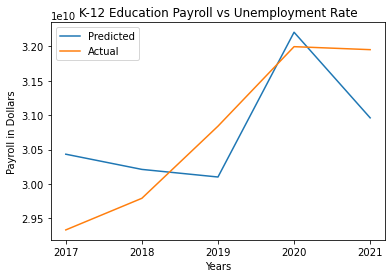

In [241]:
# unemployment rate
# https://www.macrotrends.net/countries/USA/united-states/unemployment-rate#:~:text=U.S.%20unemployment%20rate%20for%202021,a%200.46%25%20decline%20from%202017.
unemp = [4.36, 3.9, 3.67, 8.05, 5.46]

calculate_and_plot(unemp, "Education - Elementary and Secondary Total", "Unemployment Rate", fig_folder, val_dict, 'K-12 Education')

### Graduation Rate

211.49894310272106
0.9305474707770763


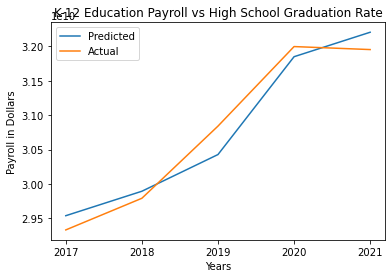

In [242]:
#https://www.statista.com/statistics/184260/educational-attainment-in-the-us/
# High school graduation rate
hsgr = [89.6,89.8,90.1,90.9,91.1]

calculate_and_plot(hsgr, "Education - Elementary and Secondary Total", "High School Graduation Rate", fig_folder, val_dict, 'K-12 Education')





205.9711914013836
0.9770092227549352


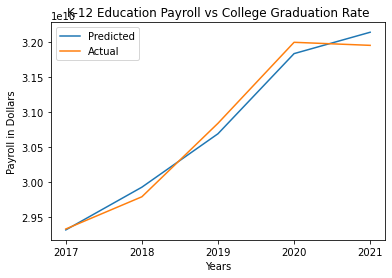

In [243]:
# College Graduation Rate
cgr = [34.2, 35, 36, 37.5, 37.9]

calculate_and_plot(cgr, "Education - Elementary and Secondary Total", "College Graduation Rate", fig_folder, val_dict, 'K-12 Education')


## Highways

In [244]:
fig_folder = "/Users/vineetkamat/Documents/Masters/Summer 2022/Theory of Statistics/Project/Regression/Highway"

### Time

192.4534953055986
0.6654372067287371


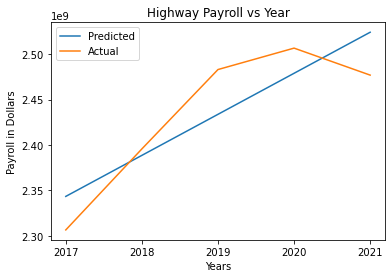

In [245]:
# Control
years = [2017,2018,2019,2020,2021]

calculate_and_plot(years, "Highways", "Year", fig_folder, val_dict,'Highway')

### Number of Cars

187.0919220999137
0.8855074284499387


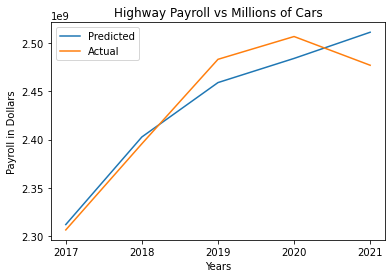

In [246]:
# Number of cars
# https://www.zippia.com/advice/how-many-cars-in-the-us/

num_cars = [270.4,279.1,284.5,286.9,289.5]

calculate_and_plot(num_cars, "Highways", "Millions of Cars", fig_folder, val_dict,'Highway')

196.32826240230483
0.27383446093387986


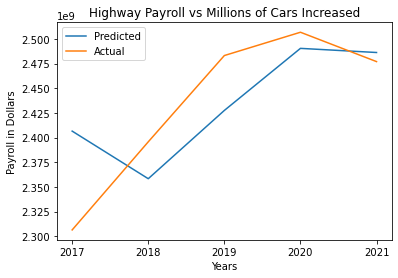

In [247]:
# Number of cars increased from previous year
# https://www.zippia.com/advice/how-many-cars-in-the-us/

num_cars = [264, 270.4,279.1,284.5,286.9,289.5]
num_cars_increased = [num_cars[i]-num_cars[i-1] for i in range(1, len(num_cars))]

calculate_and_plot(num_cars_increased, "Highways", "Millions of Cars Increased", fig_folder, val_dict,'Highway')

## Note this is not the full results but essentially these will be the methods used to do analysis on all the models